In [1]:
import os
import rasterio
import xmltodict
import numpy as np
from os import environ
environ["OPENCV_IO_ENABLE_JASPER"] = "true"
import cv2 
from rasterio.features import rasterize

import matplotlib.pyplot as plt
%matplotlib inline

jp2_root = './test/S2A_MSIL2A_20190613T135121_N9999_R024_T21LZD_20210602T011127.SAFE/GRANULE/L2A_T21LZD_A020756_20190613T135115/IMG_DATA/R20m'
def jp2_files():
    for idx in ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B8A']: # 'B08' - файл отсутствует, 'B08A' - файл отсутствует заменил на B8A
        yield os.path.join(jp2_root,'T21LZD_20190613T135121_{}_20m.jp2'.format(idx))

with open('./test/S2A_MSIL2A_20190613T135121_N9999_R024_T21LZD_20210602T011127.SAFE/GRANULE/L2A_T21LZD_A020756_20190613T135115/QI_DATA/MSK_CLOUDS_B00.gml') as f:
    cloud_mask = xmltodict.parse(f.read())
        
with open('./test/S2A_MSIL2A_20190613T135121_N9999_R024_T21LZD_20210602T011127.SAFE/GRANULE/L2A_T21LZD_A020756_20190613T135115/MTD_TL.xml') as f:
    tils = xmltodict.parse(f.read())

In [2]:
bands = []
for file in jp2_files():
    bands.append(cv2.imread(file, cv2.IMREAD_GRAYSCALE))
bands = np.stack(bands, axis=2)

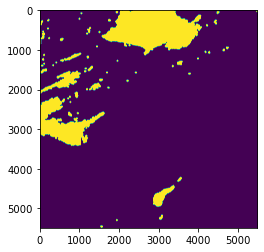

In [3]:
cloud_mask = [ item['eop:extentOf']['gml:Polygon']['gml:exterior']['gml:LinearRing']['gml:posList']['#text'] for item in cloud_mask['eop:Mask']['eop:maskMembers']['eop:MaskFeature'] ]
cloud_mask = [[int(item) for item in rec.split(' ')] for rec in cloud_mask]
shapes = []
burnval = 1
for item in cloud_mask:
    ret_item = []
    for i in range(1, len(item), 2):
        ret_item.append(((item[i-1] - 799980) / 20 , (8400040 - item[i]) / 20))
    d= {
    'type': 'Polygon',
    'coordinates': [ret_item]
}
    shapes.append(d)

mask = rasterize(shapes, (5490, 5490))
plt.imshow(mask)

In [4]:
print(bands.shape)
print(mask.shape)

(5490, 5490, 7)
(5490, 5490)


In [5]:
np.save('bands.npy', bands)
np.save('mask.npy', mask)